---


## Contexto Análise explorátoria  

O intuíto dessa análise é extrair insights sobre o grande volume de demissões em massa em grandes empresas de tecnologia e serviços, que estão apreensivos sobre a desaceleração econômica pós covid e possivelmente uma recessão, uma vez que, a diminuição dos gastos do consumidor por conta de uma taxa de juros alta para conter a inflação, assombra a demanda dessas empresas.

Está análise também visa demonstrar alguns métodos e técnicas usadas para gerar insights.

Principais questionamentos sobre as ondas de demissões:

1. Evolução de demissões desde o COVID-19
2. Principais países impactados com número de demissões
3. A empresas que mais demitiram 
4. Os setores mais impactados com demissões
5. Visão no Brasil: quais estados, empresas e setores mais demitiram


---

### **Divisão do Ciclo de Análise**

1. Coleta de Dados e Visão geral 
2. Limpeza e tratamento dos dados
3. Análise e ordenação das colunas de interesse
4. Exploração dos dados

---

> **Leitura e visão geral do dataframe**

 Leitura do arquivo disponibilizado no Kaggle em csv da base de dados do site https://layoffs.fyi/ até a data 06/03/2023.

**Visão geral:**

- **Estrutura dos Dados:** Os dados estão distribuidos respectivamente por: Empresa, Cidade/Região, Setor, Total de demitidos, Porcentagem demitidos, data, pós/pré IPO, País, Fundo Arrecado.
    
    
- **Dados faltantes e tipo alterados:** Podemos notar a presença de valores ausentes, uma hipotese pláusivel seria por conta da coleta oriunda de webscraping pelo site Lay offs, de sites de notícias sem dados de demissão, somente com a informação de possíveis demissões futuras ou afins. Também podemos ver a disparidade do tipo do dado, como na coluna date que se encontra como object não como date de data.

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
file = pd.read_csv('layoffs.csv')

In [46]:
df_raw = file

In [47]:
# Tamanho do dataframe: linhas, colunas
df_raw.shape

(2357, 9)

In [48]:
df_raw.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0


>**Análise de dados faltantes**


- 739 dados faltantes em total_laid_off 

- 784 dados faltantes em percentage_laid_off

- 209 dados faltantes em funds_raised

- 1 dado faltante em industry

- 1 dado faltante em date

- 6 dados faltante em steage

In [49]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2357 non-null   object 
 1   location             2357 non-null   object 
 2   industry             2356 non-null   object 
 3   total_laid_off       1618 non-null   float64
 4   percentage_laid_off  1573 non-null   float64
 5   date                 2356 non-null   object 
 6   stage                2351 non-null   object 
 7   country              2357 non-null   object 
 8   funds_raised         2148 non-null   float64
dtypes: float64(3), object(6)
memory usage: 165.9+ KB


In [51]:
df_raw.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

>**Tratamento de dados faltantes**

O preenchimento do faltante nesse caso com 0 não impactará em nossa análise, pois se comparado ao percentual também de demitidos, não há valor, uma vez que o dado faltante se trata de uma previsão de demissão e não das ocorridas.

In [50]:
df_raw.fillna(0, inplace=True)

In [52]:
df_raw.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,0.00,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,0.00,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0


> **Análise e ordenação das colunas de interesse**

Para uma melhor legibilidade, foi reordenado as colunas com a lógica do macro ao micro (Ano - Países - Áreas...) e transformado os dados 'Other' por 'Software/Services, uma vez que, as empresas dentro desse contexto melhor se encaixavam no cenário de software como no caso da Microsoft 

In [12]:
# Selecionando colunas na ordem de interesse para novo df 
df = df_raw[['date', 'country', 'location', 'industry', 'company', 'total_laid_off', 
                 'percentage_laid_off', 'stage', 'funds_raised']]

In [13]:
# Formatação das colunas para uma análise mais fluida, transformação da coluna date(object) para date(datetime) 

df.rename({'total_laid_off': 'total laid off', 'percentage_laid_off': '% laid off'}, axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['industry'] = df['industry'].replace('Other', 'Software/Services')
df.columns = [col.title() for col in df.columns]

In [14]:
# novo df
df.head(5)

,Date,Country,Location,Industry,Company,Total Laid Off,% Laid Off,Stage,Funds_Raised
0,2023-03-06,Australia,Sydney,Software/Services,Atlassian,500.0,0.05,Post-IPO,210.0
1,2023-03-06,United States,New York City,Media,SiriusXM,475.0,0.08,Post-IPO,525.0
2,2023-03-06,Nigeria,Ibadan,Retail,Alerzo,400.0,0.00,Series B,16.0
3,2023-03-06,India,Mumbai,Education,UpGrad,120.0,0.00,Unknown,631.0
4,2023-03-03,Brazil,Sao Paulo,Real Estate,Loft,340.0,0.15,Unknown,788.0


In [15]:
df.dtypes

Date              datetime64[ns]
Country                   object
Location                  object
Industry                  object
Company                   object
Total Laid Off           float64
% Laid Off               float64
Stage                     object
Funds_Raised             float64
dtype: object

---

# Exploração dos dados

**1. Evolução de demissões desde o COVID-19**

In [63]:
layoff_year = df.groupby(df['Date'].dt.year, sort= False)['Total Laid Off'].sum().reset_index().loc[0:3]

In [64]:
layoff_year

,Date,Total Laid Off
0,2023,125677.0
1,2022,161411.0
2,2021,15823.0
3,2020,80998.0


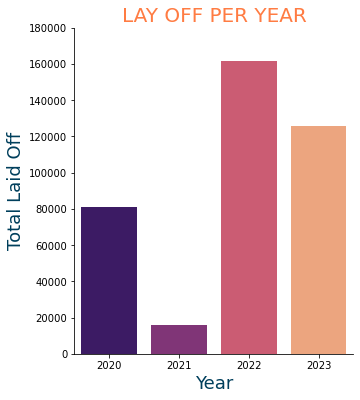

In [65]:
plt.figure(figsize=(5,6))

plt.title('LAY OFF PER YEAR', color='#ff7c43', fontsize=20)
y = sns.barplot(x='Date', y='Total Laid Off', data= layoff_year, palette='magma')
sns.despine()
y.set(ylim=(0, 180000))
plt.xlabel('Year', size=18, color='#003f5c')
plt.ylabel('Total Laid Off', size=18, color='#003f5c')

plt.show()

-----

**2. Principais países impactados com número de demissões**

In [19]:
layoff_country = df.groupby(['Country', df['Date'].dt.year])['Total Laid Off'].sum().reset_index()

In [20]:
def get_layoff_by_year(data, year, n=5):
    return data.query(f'Date == {year}').nlargest(n, 'Total Laid Off')

In [21]:
layoff_country_2020 = get_layoff_by_year(layoff_country, 2020)

In [22]:
layoff_country_2021 = get_layoff_by_year(layoff_country, 2021)

In [23]:
layoff_country_2022 = get_layoff_by_year(layoff_country, 2022)

In [69]:
layoff_country_2023 = get_layoff_by_year(layoff_country, 2023)
layoff_country_2020

,Country,Date,Total Laid Off
107,United States,2020,50385.0
45,India,2020,12932.0
68,Netherlands,2020,4600.0
8,Brazil,2020,3341.0
85,Singapore,2020,2361.0


In [25]:
df_years_lof = [layoff_country_2023, layoff_country_2022, layoff_country_2021, layoff_country_2020]
years_title = ['2023', '2022', '2021', '2020']

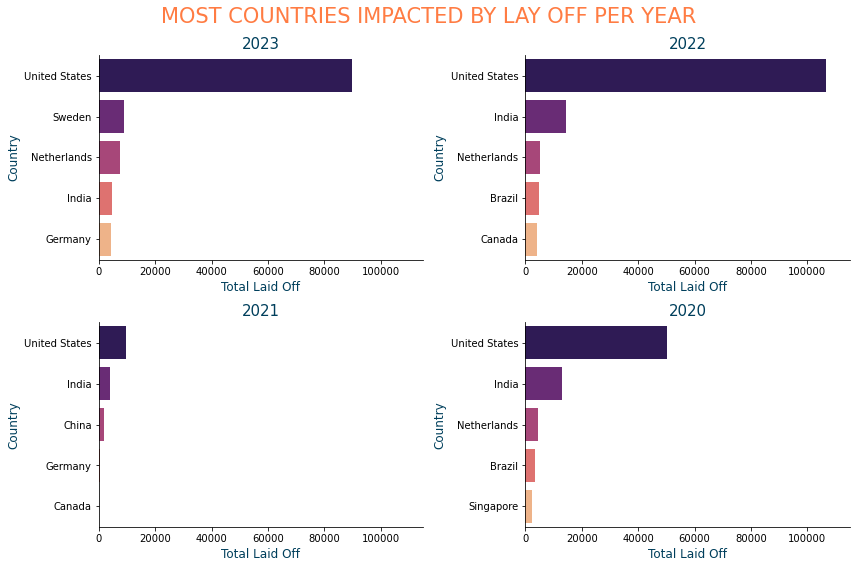

In [26]:
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize= (12,8))
fig.suptitle('MOST COUNTRIES IMPACTED BY LAY OFF PER YEAR', fontsize= 21, color='#ff7c43')


for i, ax, title in zip(df_years_lof, ax.flat, years_title):
    sns.barplot(x= 'Total Laid Off', y= 'Country', data=i, palette= 'magma', ax=ax)
    sns.despine()
    ax.set_title(title, size=15, color='#003f5c')
    ax.set(xlim=(0, 115000))
    ax.set_xlabel("Total Laid Off", size= 12, color='#003f5c')
    ax.set_ylabel("Country", size= 12, color='#003f5c')
    plt.tight_layout()

    
plt.show()

-----

3.**Empresas que mais demitiram**

In [27]:
top_company_lof = df.groupby(['Company', df['Date'].dt.year])['Total Laid Off'].sum().reset_index()

In [28]:
def get_layoff_company(data, year, n=10):
    return data.query(f'Date == {year}').nlargest(n, 'Total Laid Off')

In [73]:
layoff_company_2022 = get_layoff_company(top_company_lof, 2022)
layoff_company_2023 = get_layoff_company(top_company_lof, 2023)

In [30]:
df_company_lof = [layoff_company_2023, layoff_company_2022]
years_title_01 = ['2023', '2022']

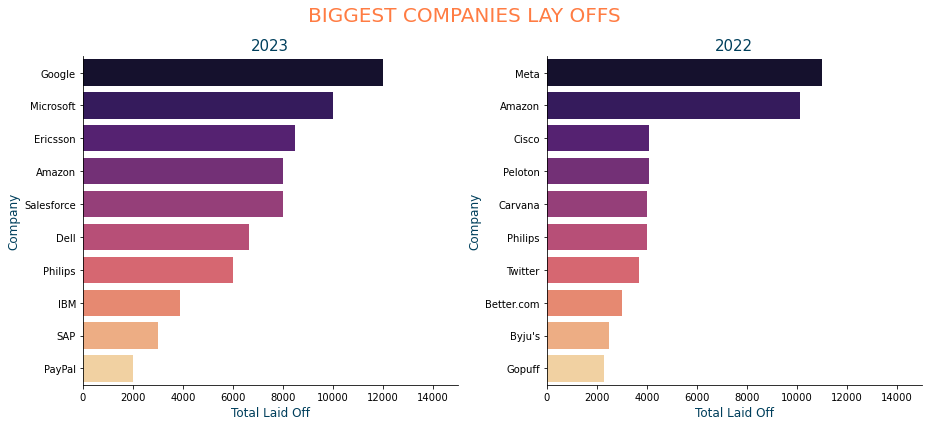

In [31]:
fig01, ax01 = plt.subplots(nrows= 1, ncols= 2, figsize= (13,6))
fig01.suptitle('BIGGEST COMPANIES LAY OFFS', fontsize= 20, color='#ff7c43')


for i01, ax01, title01 in zip(df_company_lof, ax01.flat, years_title_01):
    sns.barplot(x= 'Total Laid Off', y= 'Company', data= i01, palette= 'magma', ax=ax01)
    sns.despine()
    ax01.set_title(title01, size=15, color='#003f5c')
    ax01.set(xlim=(0, 15000))
    ax01.set_xlabel("Total Laid Off", size= 12, color='#003f5c')
    ax01.set_ylabel("Company", size= 12, color='#003f5c')
    plt.tight_layout()

    
plt.show()

------

4.**Os setores mais impactados**

In [32]:
top_sector_lof = df.groupby(['Industry', df['Date'].dt.year])['Total Laid Off'].sum().reset_index()

In [33]:
def get_layoff_sector(data, year, n=10, company='Company'):
    return data.query(f'Date == {year}').nlargest(n, 'Total Laid Off')

In [76]:
layoff_sector_2022 = get_layoff_sector(top_sector_lof, 2022)
layoff_sector_2023 = get_layoff_sector(top_sector_lof, 2023)

In [35]:
df_sector_lof = [layoff_sector_2023, layoff_sector_2022]
years_title_02 = ['2023', '2022']

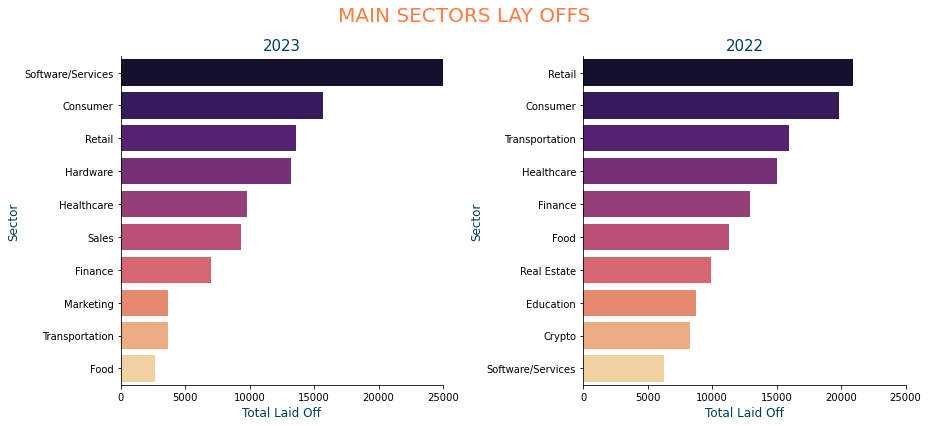

In [36]:
fig02, ax02 = plt.subplots(nrows= 1, ncols= 2, figsize= (13,6))
fig02.suptitle('MAIN SECTORS LAY OFFS', fontsize= 20, color='#ff7c43')


for i02, ax02, title02 in zip(df_sector_lof, ax02.flat, years_title_02):
    sns.barplot(x= 'Total Laid Off', y= 'Industry', data= i02, palette= 'magma', ax=ax02)
    sns.despine()
    ax02.set_title(title02, size=15, color='#003f5c')
    ax02.set(xlim=(0, 25000))
    ax02.set_xlabel("Total Laid Off", size= 12, color='#003f5c')
    ax02.set_ylabel("Sector", size= 12, color='#003f5c')
    plt.tight_layout()

    
plt.show()

----

**5. Visão no Brasil: quais estados, empresas e setores mais demitiram**

In [37]:
brazil_lof = df.groupby(['Country', 'Industry', 'Company', 'Location', df['Date'].dt.year])['Total Laid Off'].sum().reset_index()

In [38]:
def get_brazil_lof_location(data, year, n=len(df['Date'])):
    return data.query(f'Date == {year} & Country == "Brazil" ').groupby(['Location', 'Date']).sum().nlargest(n, 'Total Laid Off').reset_index()

def get_brazil_lof_sector(data, year, n=len(df['Date'])):
    return data.query(f'Date == {year} & Country == "Brazil"').groupby(['Industry', 'Date']).sum().nlargest(n, 'Total Laid Off').reset_index()

def get_brazil_lof_company(data, year, n=len(df['Date'])):
    return data.query(f'Date == {year} & Country == "Brazil"').groupby(['Company', 'Date']).sum().nlargest(n, 'Total Laid Off').reset_index()


In [39]:
brazil_lof_sector_2022 = get_brazil_lof_sector(brazil_lof, 2022)
brazil_lof_sector_2023 = get_brazil_lof_sector(brazil_lof, 2023)

In [40]:
brazil_lof_location_2022 = get_brazil_lof_location(brazil_lof, 2022)
brazil_lof_location_2023 = get_brazil_lof_location(brazil_lof, 2023)

In [41]:
brazil_lof_company_2022 = get_brazil_lof_company(brazil_lof, 2022)
brazil_lof_company_2023 = get_brazil_lof_company(brazil_lof, 2023)

In [42]:
brazil_lof_location = [brazil_lof_location_2023, brazil_lof_location_2022]
brazil_lof_sector = [brazil_lof_sector_2023, brazil_lof_sector_2022]
brazil_lof_company = [brazil_lof_company_2023, brazil_lof_company_2022]

years_title_03 = ['2023', '2022']

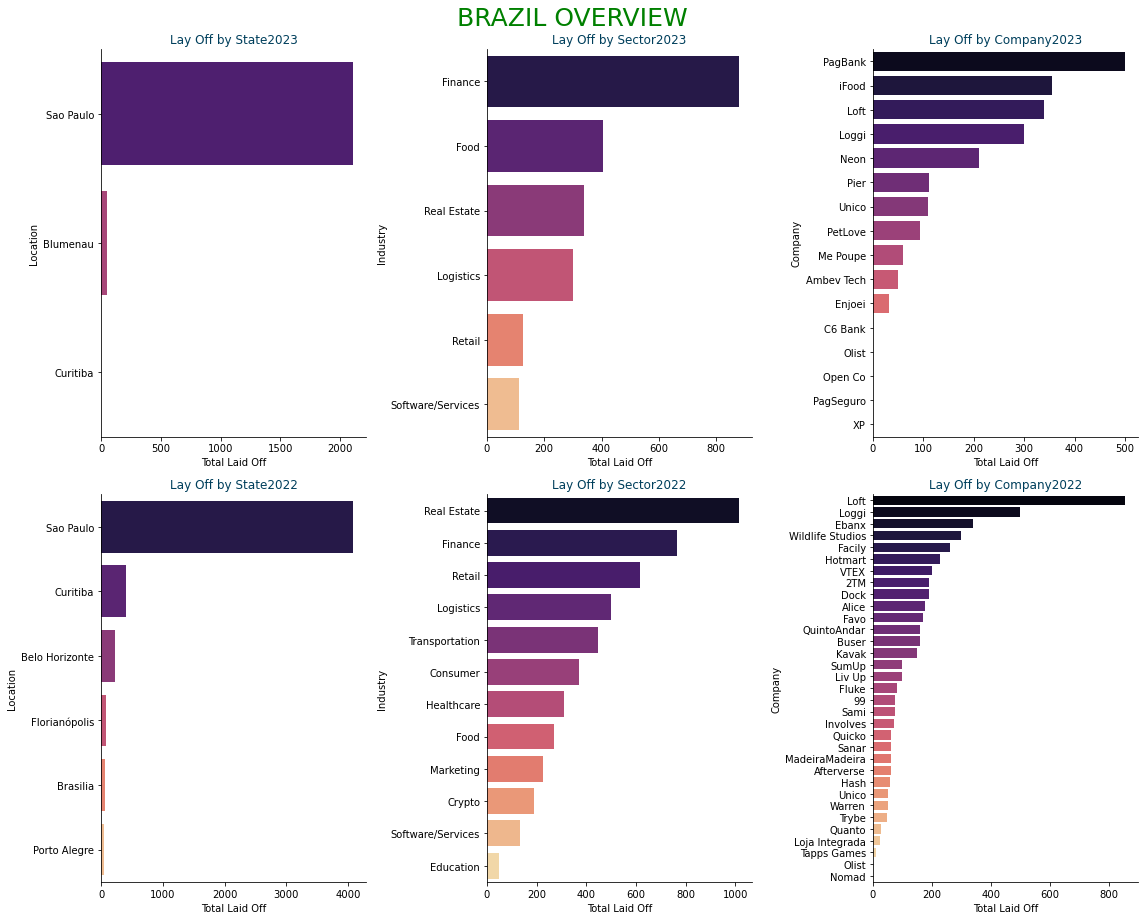

In [43]:
fig04, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 13))
fig04.suptitle('BRAZIL OVERVIEW', fontsize= 25, color='green')


for i, year in enumerate(years_title_03):
    sns.barplot(x='Total Laid Off', y='Location',  data=brazil_lof_location[i], ax=axes[i, 0], palette= 'magma')
    sns.barplot(x='Total Laid Off', y='Industry', data=brazil_lof_sector[i], ax=axes[i, 1], palette= 'magma')
    sns.barplot(x='Total Laid Off', y='Company', data=brazil_lof_company[i], ax=axes[i, 2], palette= 'magma')

    axes[i, 0].set_title('Lay Off by State' + year, color='#003f5c')
    axes[i, 1].set_title('Lay Off by Sector' + year, color='#003f5c')
    axes[i, 2].set_title('Lay Off by Company' + year, color='#003f5c')
    
    sns.despine()
    
plt.tight_layout()
plt.show()

A demanda gerada pela virtualização dos serviços durante a pandemia, poderá ter sido causa disso também junto a queda de demanda das grandes empresas da cadeia produtiva?